In [1]:
from __future__ import print_function
import tensorflow as tf
import keras
import pickle
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model 
import numpy as np
import os
from sklearn.model_selection import train_test_split

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

Using TensorFlow backend.


In [2]:
def lr_schedule(epoch):
    
    lr = 1e-3 #1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 80:
        lr *= 1e-3
    elif epoch > 40: # 120
        lr *= 1e-2
    elif epoch > 30: #80
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

In [3]:
# Training parameters
batch_size = 8
epochs = 50
num_classes = 2

In [4]:
#pickle_in = open("./new_data/X.pickle","rb")
pickle_in = open("/home/trojan/Desktop/dimentia/attention/CBAM/Implementation/CBAM-keras-master/X.pickle","rb")
X = pickle.load(pickle_in)

#pickle_in = open("./new_data/y.pickle","rb")
pickle_in = open("/home/trojan/Desktop/dimentia/attention/CBAM/Implementation/CBAM-keras-master/y.pickle","rb")
y = pickle.load(pickle_in)

In [5]:
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape, y.shape

In [10]:
x_train, x_val, y_train, y_valid = train_test_split(X, y,
                                                  shuffle=True, stratify=y, 
                                                  test_size=0.2, random_state=42)

In [12]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [14]:
initializer = 'he_normal'
model = Sequential()

model.add(Conv2D(32, (5, 5), padding='same', input_shape = input_shape, kernel_initializer=initializer))
#model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(64, (5, 5), padding='same', kernel_initializer=initializer))
#model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer=initializer))
#model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer=initializer))
#model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(512, (3, 3), padding='same', kernel_initializer=initializer))
#model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(1024, kernel_initializer=initializer))
#model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(1024, kernel_initializer=initializer))
#model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(32, kernel_initializer=initializer))
#model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(32, kernel_initializer=initializer))
#model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(1024, kernel_initializer=initializer))
#model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [15]:
model.compile(optimizer=SGD(lr=lr_schedule(0)),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
model.summary()

Learning rate:  0.001
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
activation (Activation)      (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None

In [8]:
input_shape = X.shape[1:]

In [9]:
print(input_shape)

(256, 256, 3)


In [13]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'validation samples')
print('y_train shape:', y_train.shape)

x_train shape: (7869, 256, 256, 3)
7869 train samples
1968 validation samples
y_train shape: (7869, 2)


In [16]:
'''model.compile(optimizer=tf.keras.optimizers.Adam(lr=lr_schedule(0)),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )
model.summary()'''

'model.compile(optimizer=tf.keras.optimizers.Adam(lr=lr_schedule(0)),\n        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),\n        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]\n    )\nmodel.summary()'

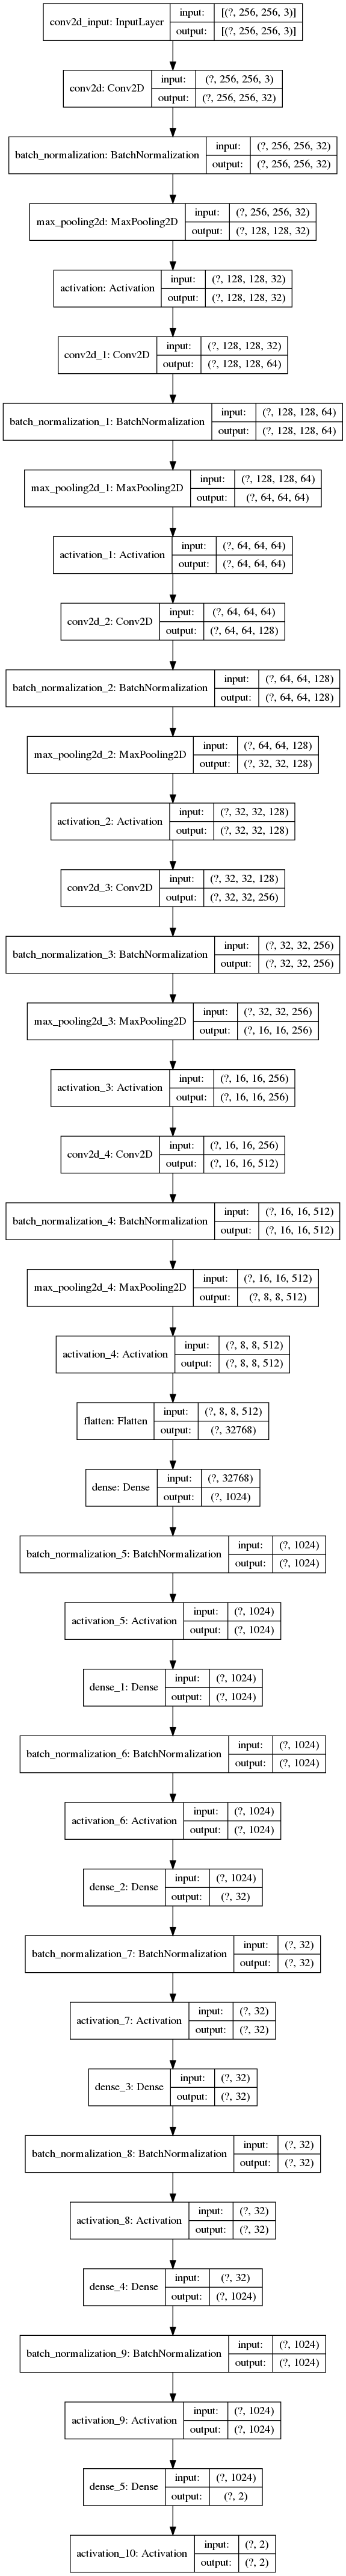

In [17]:
tf.keras.utils.plot_model(model, to_file='my_model.png', show_shapes=True)

In [18]:
# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
#es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=7)

lr_scheduler = LearningRateScheduler(lr_schedule)

callbacks = [checkpoint, lr_scheduler] # [checkpoint, lr_reducer, lr_scheduler]

In [11]:
print(np.min(x_train[1]), np.max(x_train[1]))

0 255


In [19]:
model.fit(x_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_val, y_val),
        callbacks=callbacks)

Learning rate:  0.001
Epoch 1/50
984/984 [==============================] - ETA: 0s - loss: 0.7294 - accuracy: 0.5229WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0019s vs `on_test_batch_end` time: 0.0078s). Check your callbacks.

Epoch 00001: val_accuracy improved from -inf to 0.56911, saving model to best_model.h5
984/984 [==============================] - 38s 39ms/step - loss: 0.7294 - accuracy: 0.5229 - val_loss: 0.7034 - val_accuracy: 0.5691
Learning rate:  0.001
Epoch 2/50
983/984 [============================>.] - ETA: 0s - loss: 0.6995 - accuracy: 0.5518
Epoch 00002: val_accuracy improved from 0.56911 to 0.60366, saving model to best_model.h5
984/984 [==============================] - 38s 39ms/step - loss: 0.6994 - accuracy: 0.5519 - val_loss: 0.6788 - val_accuracy: 0.6037
Learning rate:  0.001
Epoch 3/50
343/984 [=========>....................] - ETA: 23s - loss: 0.6699 - accuracy: 0.6046

KeyboardInterrupt: 

In [ ]:
model = load_model('best_model.h5')

In [ ]:
# Score trained model.
scores = model.evaluate(x_val, y_val, verbose=1)
print('Val loss:', scores[0])
print('Val accuracy:', scores[1])